In [27]:
import itertools

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, special, integrate

 - https://en.wikipedia.org/wiki/Logit-normal_distribution
 - https://en.wikipedia.org/wiki/Logistic_function
 - https://en.wikipedia.org/wiki/Logit
 
 - https://github.com/scipy/scipy/blob/v1.8.1/scipy/stats/_continuous_distns.py#L5365-L5499
 
 - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html?highlight=rv_continous
 - https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.expit.html
 - https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.logit.html
 
 - https://github.com/statsmodels/statsmodels/blob/main/statsmodels/sandbox/distributions/transformed.py#L55
 - https://github.com/scipy/scipy/issues/12133
 
 - https://stackoverflow.com/questions/60669256/how-do-you-create-a-logit-normal-distribution-in-python
 
 - https://github.com/scipy/scipy/issues/12133
 - http://scipy.github.io/devdocs/dev/contributor/adding_new.html#adding-a-new-statistics-distribution
 
 
![Example](https://upload.wikimedia.org/wikipedia/commons/a/ae/LogitnormDensityGrid.svg)
 

In [35]:
class logitnorm_gen(stats.rv_continuous):

    def _argcheck(self, m, s):
        return (s > 0.) & (s < np.inf) & (m > -np.inf) & (m < np.inf)
    
    def _pdf(self, x, m, s):
        return stats.norm(loc=m, scale=s).pdf(special.logit(x)) / (x * (1 - x))
    
    def _cdf(self, x, m, s):
        return stats.norm(loc=m, scale=s).cdf(special.logit(x))
    
    def _rvs(self, m, s, size=None, random_state=None):
        return special.expit(m + s * random_state.standard_normal(size))
    
    def fit(self, data, **kwargs):
        return stats.norm.fit(special.logit(data), **kwargs)

logitnorm = logitnorm_gen(a=0.0, b=1.0, name="logitnorm")

In [36]:
eps = 1e-12
xlin = np.linspace(0. + eps, 1. - eps, 200)

In [52]:
def generate_fixtures(
    locs=[-2.0, -1.0, 0.0, 0.5, 1.0, 2.0],
    scales=[0.32, 0.56, 1.00, 1.78, 3.16],
    sizes=[10_000], #sizes=[100, 1000, 10000],
    seeds=[789], #seeds=[789, 123456, 999999]
):
    for (loc, scale, size, seed) in itertools.product(locs, scales, sizes, seeds):
        yield {"parameters": {"m": loc, "s": scale}, "size": size, "random_state": seed}

{'parameters': {'m': -2.0, 's': 0.32}, 'size': 10000, 'random_state': 789}
(1.0, 2.8827641096858475e-11)
(-1.9966067924813036, 0.3237399508423218)
KstestResult(statistic=0.007351229466942444, pvalue=0.6494471417970672, statistic_location=0.16132722657707207, statistic_sign=-1)
Power_divergenceResult(statistic=0.00038709533690614725, pvalue=1.0)
--------------------------------------------------------------------------------
{'parameters': {'m': -2.0, 's': 0.56}, 'size': 10000, 'random_state': 789}
(1.000000000000046, 3.669515820426074e-10)
(-1.9940618868422815, 0.5665449139740633)
KstestResult(statistic=0.007351229466942555, pvalue=0.6494471417970485, statistic_location=0.20025918699350978, statistic_sign=-1)
Power_divergenceResult(statistic=0.00038324381347379865, pvalue=1.0)
--------------------------------------------------------------------------------
{'parameters': {'m': -2.0, 's': 1.0}, 'size': 10000, 'random_state': 789}
(0.9999999999981782, 3.1558511543716164e-10)
(-1.98939622

(0.9999999999581543, 5.757840537690129e-09)
(0.5335079242471283, 3.196932014567933)
KstestResult(statistic=0.007351229466942111, pvalue=0.6494471417971235, statistic_location=0.9815159448025205, statistic_sign=-1)
Power_divergenceResult(statistic=0.0002529043815459941, pvalue=1.0)
--------------------------------------------------------------------------------
{'parameters': {'m': 1.0, 's': 0.32}, 'size': 10000, 'random_state': 789}
(1.0000000000000002, 6.4305464592874234e-12)
(1.0033932075186964, 0.3237399508423218)
KstestResult(statistic=0.007351229466942666, pvalue=0.6494471417970298, statistic_location=0.7943933974845604, statistic_sign=-1)
Power_divergenceResult(statistic=0.0003867881200064241, pvalue=1.0)
--------------------------------------------------------------------------------
{'parameters': {'m': 1.0, 's': 0.56}, 'size': 10000, 'random_state': 789}


/tmp/ipykernel_1358/2592997118.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axe = plt.subplots()


(1.000000000000003, 3.101674072195112e-10)
(1.0059381131577187, 0.5665449139740633)
KstestResult(statistic=0.007351229466942111, pvalue=0.6494471417971235, statistic_location=0.8341493489775155, statistic_sign=-1)
Power_divergenceResult(statistic=0.00038452117547436635, pvalue=1.0)
--------------------------------------------------------------------------------
{'parameters': {'m': 1.0, 's': 1.0}, 'size': 10000, 'random_state': 789}
(0.9999999999998739, 1.195082856844578e-09)
(1.0106037734959263, 1.0116873463822558)
KstestResult(statistic=0.007351229466942777, pvalue=0.649447141797011, statistic_location=0.8907859294918933, statistic_sign=-1)
Power_divergenceResult(statistic=0.0003742990377244898, pvalue=1.0)
--------------------------------------------------------------------------------
{'parameters': {'m': 1.0, 's': 1.78}, 'size': 10000, 'random_state': 789}
(0.9999999999967585, 4.0374642308093485e-09)
(1.0188747168227485, 1.800803476560415)
KstestResult(statistic=0.0073512294669423

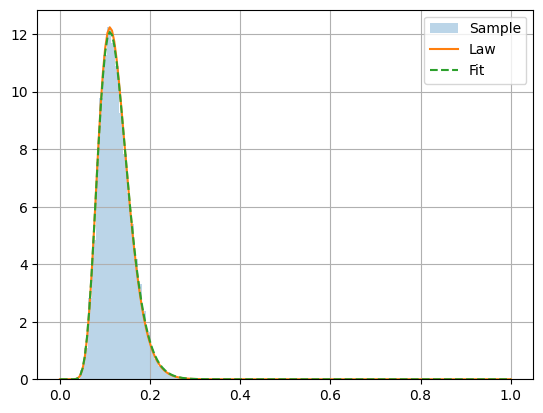

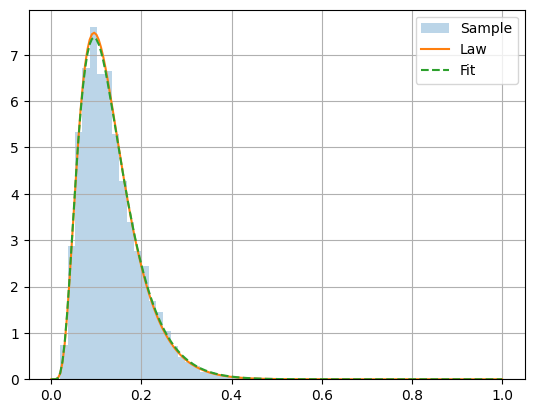

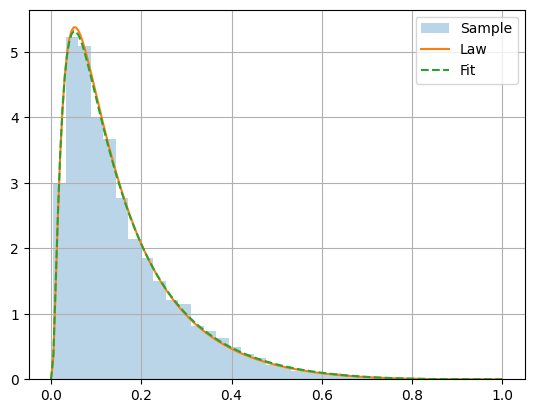

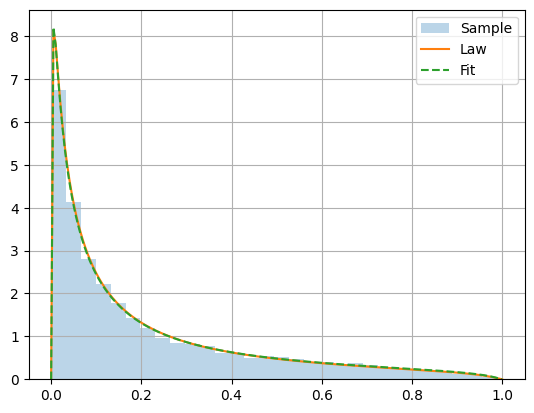

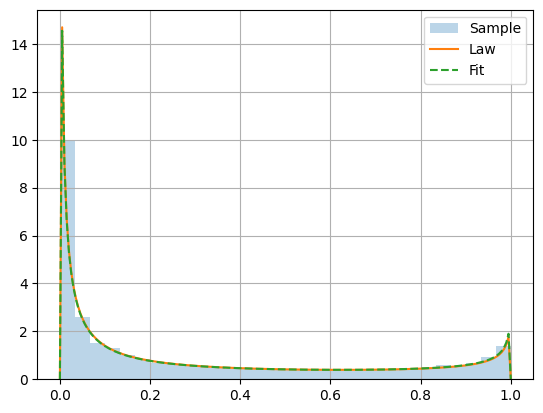

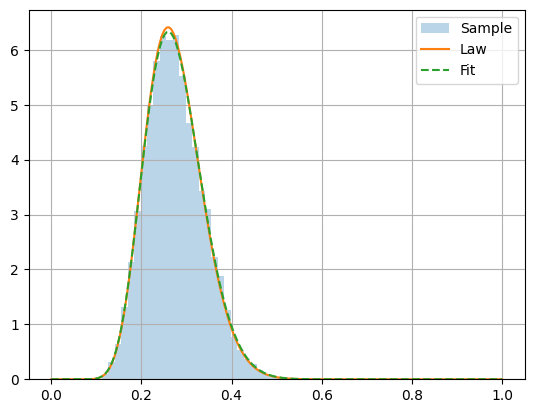

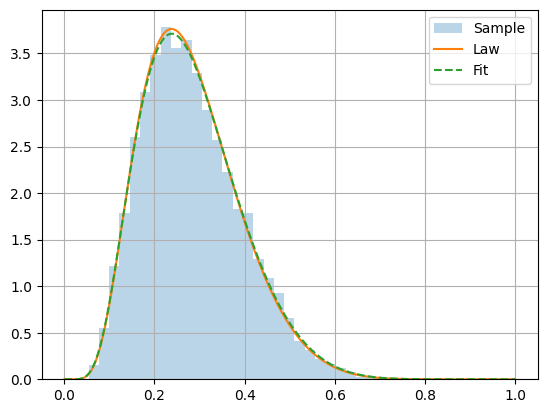

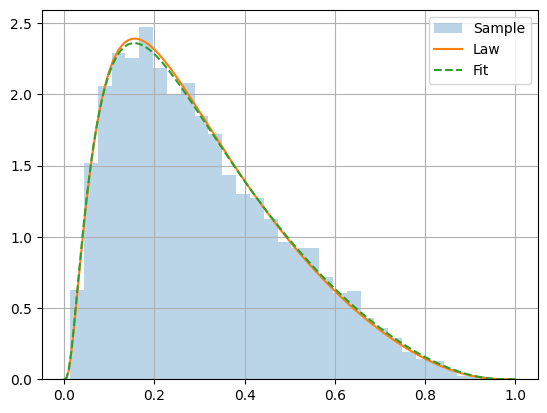

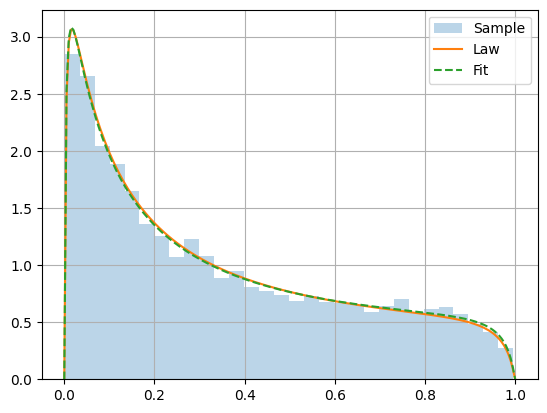

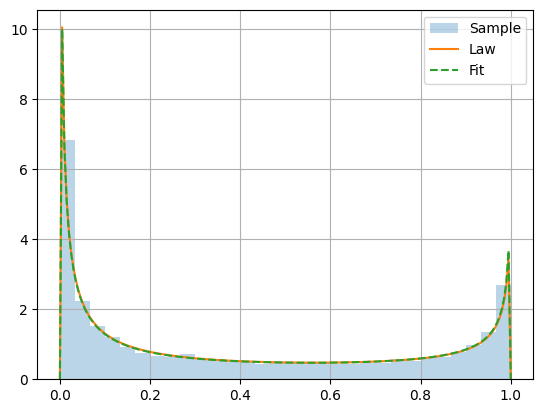

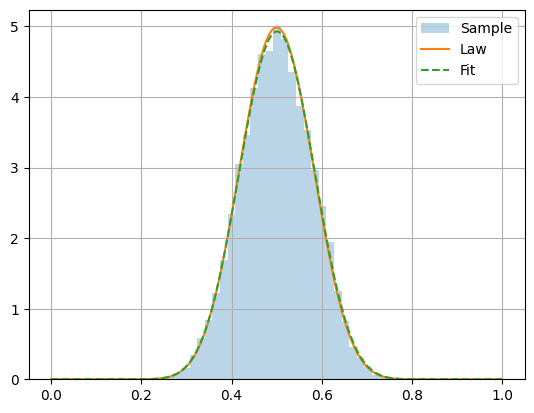

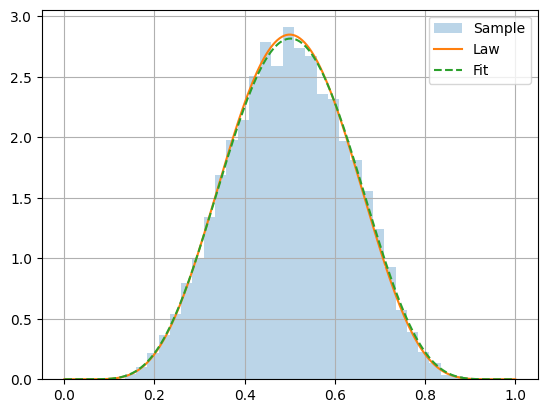

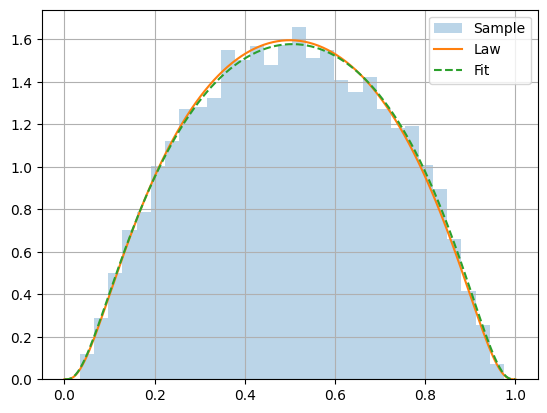

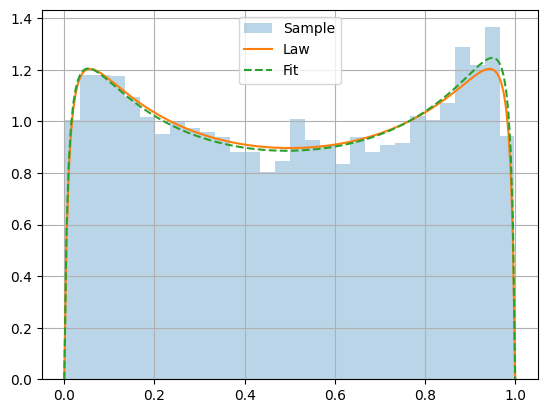

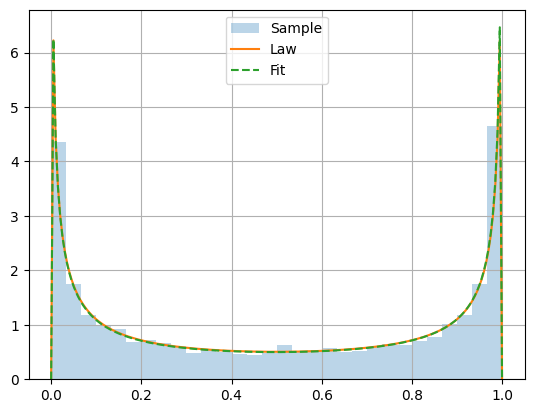

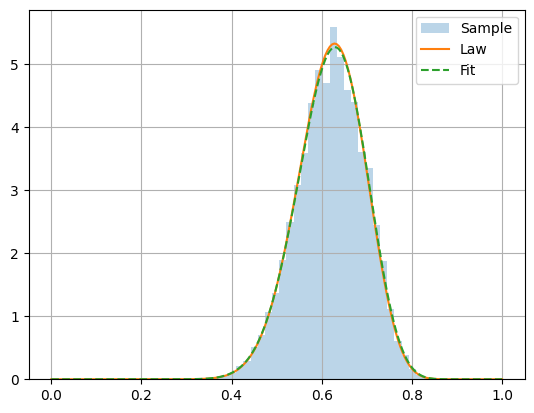

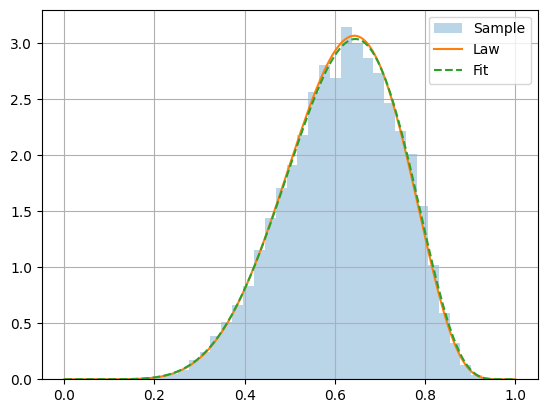

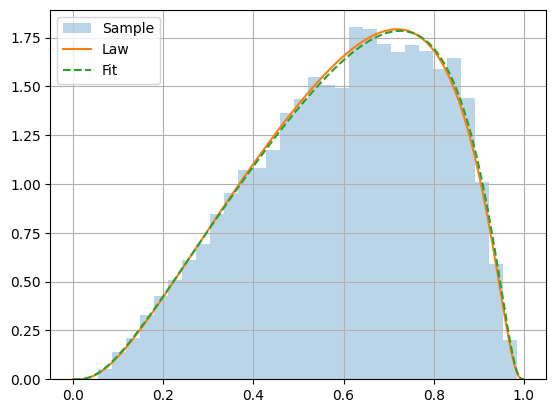

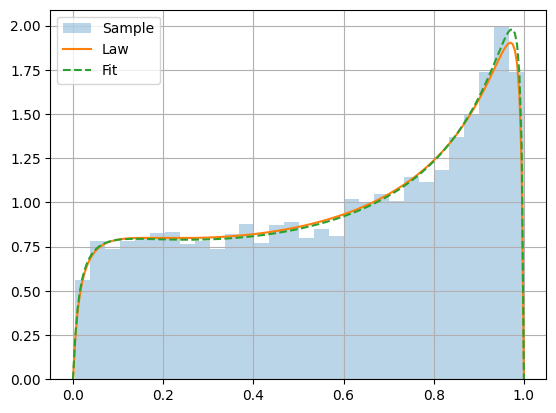

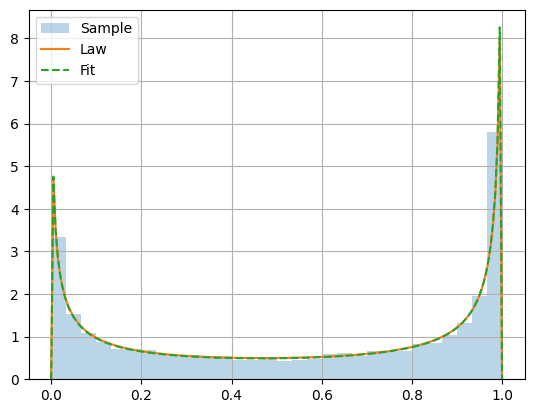

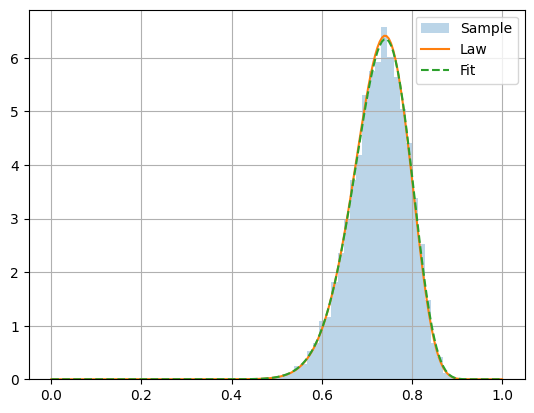

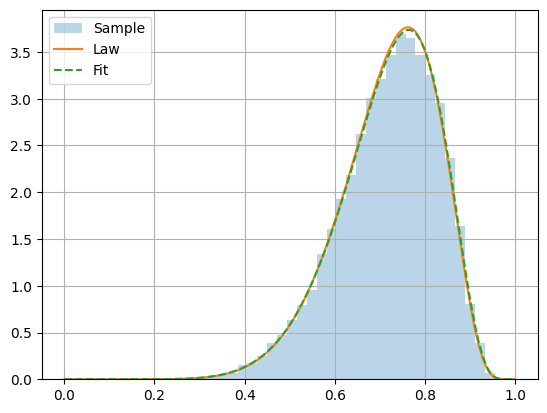

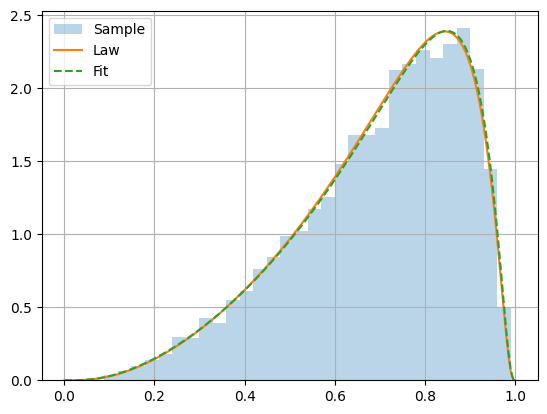

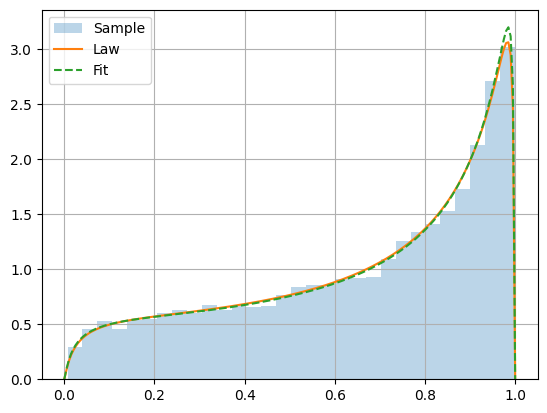

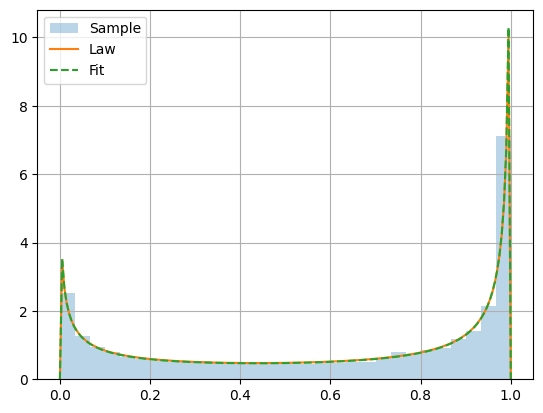

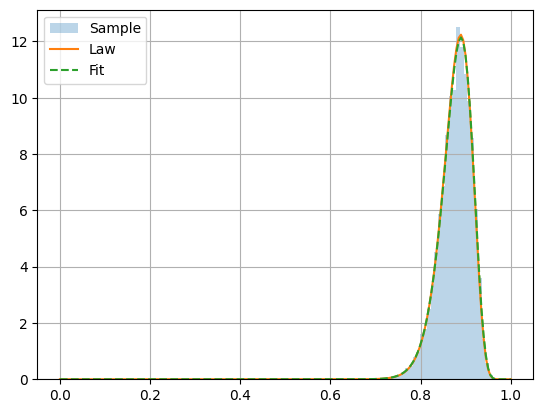

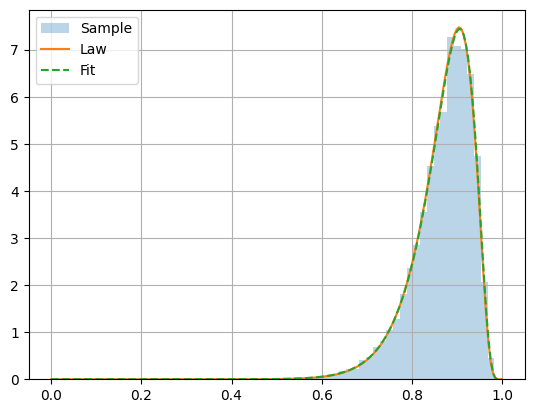

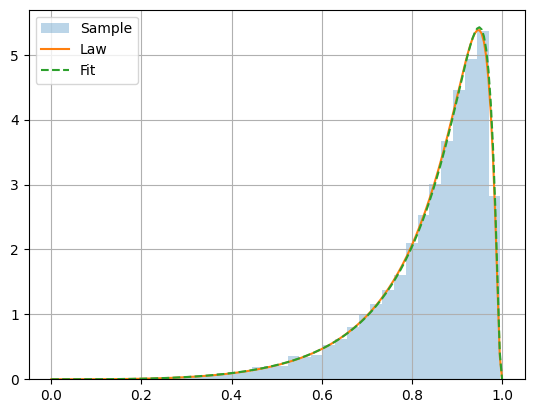

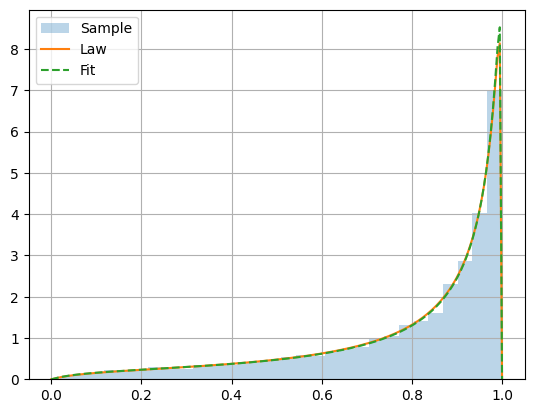

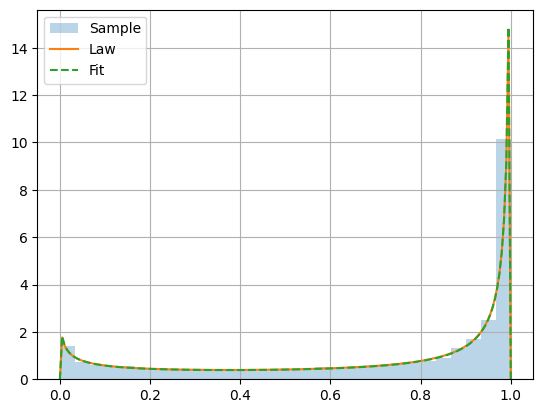

In [61]:
for fixture in generate_fixtures():
    print(fixture)
    
    parameters = fixture.pop("parameters")

    law = logitnorm(**parameters)
    data = law.rvs(**fixture)
    
    A = integrate.quad(law.pdf, 0., 1.)
    print(A)
    
    p = logitnorm.fit(data)
    model = logitnorm(*p)
    print(p)
    
    ks = stats.ks_1samp(data, model.cdf)
    print(ks)
    
    _, bins = np.histogram(data, bins=30)
    bins[0] = eps
    bins[-1] = 1. -eps
    
    f_exp = np.diff(law.cdf(bins))
    f_obs = np.diff(model.cdf(bins))
    
    chi2 = stats.chisquare(f_obs, f_exp=f_exp, ddof=2)
    print(chi2)
    
    print("-" * 80)
    
    fig, axe = plt.subplots()
    axe.hist(data, density=1., bins=30, alpha=0.3, label="Sample")
    axe.plot(xlin, law.pdf(xlin), label="Law")
    axe.plot(xlin, model.pdf(xlin), "--", label="Fit")
    axe.legend()
    axe.grid()